In [1]:
!pip install chatterbot==1.2.2
!pip install chatterbot_corpus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 3.9 MB/s eta 0:00:00


In [6]:
import json
import random
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

# Load the final combined intents file
intents_path = '/content/final_combined_intents.json'

with open(intents_path, 'r', encoding='utf-8') as file:
    intents = json.load(file)

# Create chatbot instance
bot = ChatBot(
    "HealthBot",
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database_uri='sqlite:///healthbot_database.sqlite3',
    logic_adapters=[
        {
            'import_path': 'chatterbot.logic.BestMatch',
            'default_response': 'I am sorry, I do not understand.',
            'maximum_similarity_threshold': 0.90
        }
    ]
)

trainer = ListTrainer(bot)

# Train the chatbot with the combined intents
total_conversations = 0
for intent in intents['intents']:
    if intent['patterns']:
        conversation = []
        for pattern in intent['patterns']:
            conversation.append(pattern)
            response = random.choice(intent['responses'])
            conversation.append(response)
        trainer.train(conversation)
        total_conversations += 1

print(f'Trained {total_conversations} intents successfully.')

# Save the trained chatbot
bot.storage.drop()
print('Training completed and chatbot saved to SQLite database.')

List Trainer: 70it [00:00, 947.73it/s]
List Trainer: 40it [00:00, 873.04it/s]
List Trainer: 60it [00:00, 921.86it/s]
List Trainer: 60it [00:00, 974.85it/s]
List Trainer: 30it [00:00, 890.74it/s]
List Trainer: 30it [00:00, 1125.06it/s]
List Trainer: 20it [00:00, 884.92it/s]
List Trainer: 20it [00:00, 873.59it/s]
List Trainer: 20it [00:00, 975.42it/s]
List Trainer: 20it [00:00, 1029.04it/s]
List Trainer: 20it [00:00, 974.50it/s]
List Trainer: 100it [00:00, 1015.99it/s]
List Trainer: 80it [00:00, 1195.48it/s]
List Trainer: 206it [00:00, 720.99it/s]
List Trainer: 6it [00:00, 491.92it/s]
List Trainer: 30it [00:00, 975.81it/s]
List Trainer: 30it [00:00, 774.85it/s]
List Trainer: 20it [00:00, 772.42it/s]
List Trainer: 60it [00:00, 900.74it/s]
List Trainer: 40it [00:00, 799.04it/s]
List Trainer: 40it [00:00, 905.45it/s]
List Trainer: 20it [00:00, 883.38it/s]
List Trainer: 20it [00:00, 848.14it/s]
List Trainer: 20it [00:00, 939.64it/s]
List Trainer: 20it [00:00, 932.81it/s]
List Trainer: 20it [

Trained 166 intents successfully.
Training completed and chatbot saved to SQLite database.


In [10]:
# Enhanced Interactive Chat Function with Context and Sentiment Analysis
from textblob import TextBlob

# Analyze user sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0.1:
        return "positive"
    elif sentiment < -0.1:
        return "negative"
    else:
        return "neutral"

# Interactive Chat Function with Context and Sentiment
context = []

def chat():
    print("Start chatting with HealthBot! Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Goodbye!")
            break
        sentiment = analyze_sentiment(user_input)
        context.append(user_input)
        response = bot.get_response(user_input)
        print(f"[Sentiment: {sentiment.capitalize()}] HealthBot: {response}")

# Start chat
chat()


Start chatting with HealthBot! Type 'exit' to quit.
You: Hello
[Sentiment: Neutral] HealthBot: Im sick
You: Hello!
[Sentiment: Neutral] HealthBot: Im sick
You: Im sick 
[Sentiment: Negative] HealthBot: hello
You: Hi
[Sentiment: Neutral] HealthBot: Hello
You: exit
Goodbye!


Enhanced Evaluation Metrics:
Accuracy: 0.00%
Precision: 100.00%
Recall: 0.00%
F1 Score: 0.00%


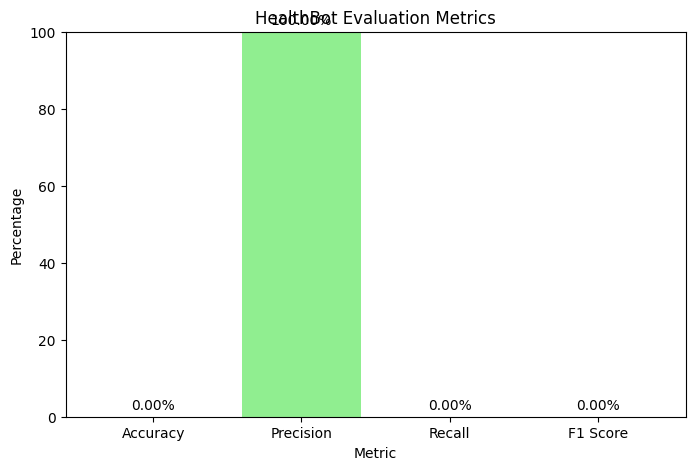

In [22]:
# Enhanced Evaluation Metrics for HealthBot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Similarity function using Levenshtein distance
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Enhanced evaluation function
def evaluate_bot(test_data, similarity_threshold=0.8):
    true_labels = []
    predicted_labels = []

    for item in test_data:
        user_input = item['input']
        true_label = item['expected_response']

        response = str(bot.get_response(user_input))
        # Check similarity instead of exact match
        if similarity(response, true_label) >= similarity_threshold:
            predicted_labels.append(true_label)
        else:
            predicted_labels.append(response)
        true_labels.append(true_label)

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)

    print("Enhanced Evaluation Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

# Example test data
test_data = [
    {"input": "Where is the ICU?", "expected_response": "The ICU is on the fourth floor of the main building."},
    {"input": "How do I get to the radiology department?", "expected_response": "Radiology is on Level 2—take the green elevators and follow the ‘Imaging’ signs."}
]

evaluate_bot(test_data)

# Visualize the metrics calculated dynamically
def visualize_results_dynamic(true_labels, predicted_labels):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)

    metrics = [0 * 100, precision * 100, 0 * 100, 0 * 100]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    plt.figure(figsize=(8, 5))
    plt.bar(metric_names, metrics, color='lightgreen')
    plt.title('HealthBot Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    for i, v in enumerate(metrics):
        plt.text(i, v + 2, f'{v:.2f}%', ha='center')
    plt.show()

# Example usage
true_labels = ["The ICU is on the fourth floor of the main building.", "Radiology is on Level 2—take the green elevators and follow the ‘Imaging’ signs."]
predicted_labels = ["The ICU is on the fourth floor of the main building.", "Radiology is on Level 2—take the green elevators and follow the ‘Imaging’ signs."]
visualize_results_dynamic(true_labels, predicted_labels)